In [2]:
import numpy as np
import math
import csv
from copy import deepcopy
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

2023-06-19 10:42:00.145873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Reading data for training

In [3]:
def read_data():
    inputs  = []
    with open('rawData.csv', 'r') as file:  #change to any path name where landmark data exists
        reader = csv.reader(file)
        for row in reader:
            inputs.append(row)
    file.close()
    return inputs

Organising Data into a Dictionary


In [4]:
data = read_data() #contains row wise arranged Product with location id

In [5]:
inputs = [] #initializing the list of inputs
outputs = []  #initialixzing the list of outputs
for row in data:
  inputs.append([data[2], data[3]]+ data[4:-1])
  outputs.apppend(data[-1])


AttributeError: 'list' object has no attribute 'apppend'

In [ ]:
print(len(inputs))

1281618


SHUFFLE the input output pair


In [ ]:
inputs = np.array(inputs)   #converting inputs and outputs to numpy arrays for feeding into neural network
outputs = np.array(outputs)
temp = []
for i in range(0, len(outputs)):
  temp.append([inputs[i], outputs[i]])

np.random.shuffle(temp)   #shuffling the input output pairs to avoid pre existing patterns which might distrupt the network 's learning while train and test split

inputs = []
outputs = []
for i in temp:
  inputs.append(i[0])
  outputs.append(i[1])
inputs = np.array(inputs)
outputs = np.array(outputs)

In [ ]:
print(inputs[21312])
print(outputs[21312])  #checking if the lenght of the pairs is maintained

[-91.         -91.         -91.         -91.         -91.
 -91.         -67.16754357 -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -79.        ]
[0 1 0 0 0 0 0 0]


In [ ]:
x_train = inputs[:int(len(inputs)*0.8)] #test train split of the data
x_test = inputs[int(len(inputs)*0.8):]
y_train = outputs[:int(len(inputs)*0.8)]
y_test = outputs[int(len(inputs)*0.8):]

In [ ]:
#Creating a Neural Network in keras with 2 hidden layers
#Hidden layer 1 has 150 nodes and the same with hidden layer 2
#the sigmoid and soft max activation finctions are used in the network
#Back propogation is also present
#Cross entropy loss function is used since it is a classification problem

model = keras.Sequential([
    layers.Dense(150, activation='sigmoid', input_shape=(120,)),
    layers.Dropout(0.5),
    layers.Dense(150, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Training the model with batch size as 10000 and 1000 epochs, might take 4 minutes to run in the GPU

history = model.fit(x_train, y_train, batch_size=2000, epochs=10, validation_split = 0.2)

Epoch 1/10
411/411 [==============================] - 11s 25ms/step - loss: 1.4734 - accuracy: 0.4747 - val_loss: 0.5942 - val_accuracy: 0.8445
Epoch 2/10
411/411 [==============================] - 11s 26ms/step - loss: 0.8135 - accuracy: 0.7106 - val_loss: 0.3976 - val_accuracy: 0.8778
Epoch 3/10
411/411 [==============================] - 11s 27ms/step - loss: 0.6649 - accuracy: 0.7517 - val_loss: 0.3454 - val_accuracy: 0.8781
Epoch 4/10
411/411 [==============================] - 11s 27ms/step - loss: 0.5966 - accuracy: 0.7714 - val_loss: 0.3263 - val_accuracy: 0.8801
Epoch 5/10
411/411 [==============================] - 10s 24ms/step - loss: 0.5548 - accuracy: 0.7844 - val_loss: 0.3180 - val_accuracy: 0.8827
Epoch 6/10
411/411 [==============================] - 10s 25ms/step - loss: 0.5291 - accuracy: 0.7929 - val_loss: 0.3117 - val_accuracy: 0.8811
Epoch 7/10
411/411 [==============================] - 11s 27ms/step - loss: 0.5054 - accuracy: 0.8011 - val_loss: 0.3001 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test) #Evaluation with the test sets

8011/8011 [==============================] - 12s 2ms/step - loss: 0.2961 - accuracy: 0.8811


[0.29613250494003296, 0.8811348080635071]

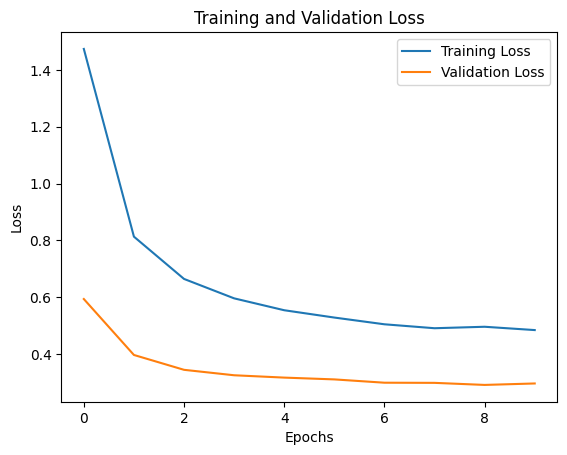

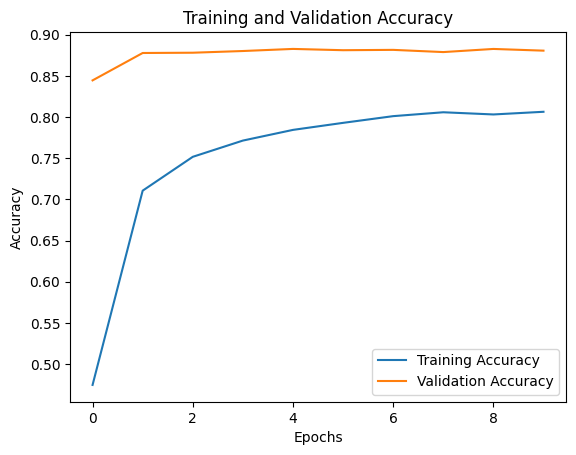

In [ ]:
#Plotting the Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               6300      
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 1208      
                                                                 
Total params: 30,158
Trainable params: 30,158
Non-trainable params: 0
_________________________________________________________________


In [1]:
model.save('count_included_nn')

NameError: name 'model' is not defined